# Inserting Data

In [2]:
#Import Pandas, matplotlip and seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
orders_raw = pd.read_excel("./Muesli Project raw data.xlsx", sheet_name=0)
on_truck_raw =pd.read_excel("./Muesli Project raw data.xlsx", sheet_name=1)
pickup_raw = pd.read_excel("./Muesli Project raw data.xlsx", sheet_name=2)
delivered_raw = pd.read_excel("./Muesli Project raw data.xlsx", sheet_name=3)

Pseudocode:

- Load in all the data in different data frames
- clear data to have only relevant date (drop customer name), and make sure data types are the ones we need, drop duplicates


- merge on_truck_raw & pickup_raw with outer merge - check if "on truck scan date" and "ready to ship" are the same dates, if yes combine both columns
- inner merge between orders_raw and delivered_raw to have the  overall time from ordering to delivered - calculate average in time difference (Overall Process)
- inner merge between orders_raw and pickup_raw to receive the timeframe between order and ready to ship (Leaving Warehouse)
- inner merge merged ready to ship data (first merging point here) with delivered_raw, to get shipping time (Shipping)
- inner merge between orders_raw and on_truck_raw inner to get processing time (Processing)

In [4]:
print(orders_raw.info())
orders_raw.head(2)
orders_raw['Order ID'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Index           9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Mode       9994 non-null   object        
 4   Customer ID     9994 non-null   object        
 5   Customer Name   9994 non-null   object        
 6   Origin Channel  9994 non-null   object        
 7   Country/Region  9994 non-null   object        
 8   City            9994 non-null   object        
 9   State           9994 non-null   object        
 10  Postal Code     9983 non-null   float64       
 11  Region          9994 non-null   object        
 12  Category        9994 non-null   object        
 13  Sub-Category    9994 non-null   object        
 14  Product ID      9994 non-null   object        
 15  Sale

5009

In [5]:
print(on_truck_raw.info())
on_truck_raw.head(2)
on_truck_raw['Order ID'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Row ID              5899 non-null   int64         
 1   Order ID            5899 non-null   object        
 2   Order Date          5899 non-null   datetime64[ns]
 3   On Truck Scan Date  5899 non-null   datetime64[ns]
 4   Ship Mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB
None


3002

In [6]:
print(pickup_raw.info())
pickup_raw['Order ID'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            290 non-null    object        
 1   Ready to Ship Date  290 non-null    datetime64[ns]
 2   Pickup Date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB
None


204

In [7]:
delivered_raw.info()
delivered_raw['Order ID'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           333 non-null    object        
 1   Arrival Scan Date  333 non-null    datetime64[ns]
 2   Customer Name      333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


333

# Cleaning Data

In [8]:
def clean_column_drop_dupl(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ", "_")
    df = df.drop_duplicates(['order_id'])
    return df

#def drop_dupl_orderid(df):
 #   df = df.drop_duplicates(['order_id'])
  #  return df


In [9]:
orders_clean = clean_column_drop_dupl(orders_raw)
on_truck_clean = clean_column_drop_dupl(on_truck_raw)
pickup_clean = clean_column_drop_dupl(pickup_raw)
delivered_clean = clean_column_drop_dupl(delivered_raw)

In [10]:
#dropping columns
orders_clean.drop(['index', 'customer_name'], axis=1, inplace = True)
orders_clean.head(2)

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_910/817408111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clean.drop(['index', 'customer_name'], axis=1, inplace = True)


,order_id,order_date,ship_mode,customer_id,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,CA-2019-118255,2019-03-11,First Class,ON-18715,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714


In [11]:
#dropping column
on_truck_clean.drop(['row_id'], axis=1, inplace = True)
on_truck_clean.head(2)

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_910/2083815319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  on_truck_clean.drop(['row_id'], axis=1, inplace = True)


,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2020-126221,2020-12-30,2021-01-06,Standard Processing
1,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing


In [12]:
#dropping customer name
delivered_clean.drop(['customer_name'], axis=1, inplace = True)
delivered_clean

,order_id,arrival_scan_date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03
2,CA-2019-130001,2019-05-03
3,CA-2019-113061,2019-05-06
4,CA-2019-162138,2019-05-06
...,...,...
328,CA-2020-129707,2020-05-08
329,CA-2020-125381,2020-05-08
330,CA-2020-141733,2020-05-15
331,US-2020-104451,2020-05-15


# Merges

- merge on_truck_clean & pickup_clean with outer merge - check if "on truck scan date" and "ready to ship" are the same dates, if yes combine both columns
- inner merge between orders_clean and delivered_clean to have the  overall time from ordering to delivered - calculate average in time difference (Overall Process)
- inner merge between orders_clean and on_truck_clean inner to get processing time (Processing)
- inner merge between orders_clean and pickup_clean to receive the timeframe between order and ready to ship (Leaving Warehouse)
- inner merge merged ready to ship data (first merging point here) with delivered_clean, to get shipping time (Shipping)


In [13]:
#merge on_truck_clean and pickup_clean
pickup_truck = on_truck_clean.merge(pickup_clean, how= "outer", on="order_id")
pickup_truck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3002 non-null   object        
 1   order_date          3002 non-null   datetime64[ns]
 2   on_truck_scan_date  3002 non-null   datetime64[ns]
 3   ship_mode           3002 non-null   object        
 4   ready_to_ship_date  204 non-null    datetime64[ns]
 5   pickup_date         204 non-null    datetime64[ns]
dtypes: datetime64[ns](4), object(2)
memory usage: 140.8+ KB


In [14]:
pickup_truck.duplicated().value_counts()

False    3002
Name: count, dtype: int64

In [15]:
pickup_truck.notnull().value_counts()

order_id  order_date  on_truck_scan_date  ship_mode  ready_to_ship_date  pickup_date
True      True        True                True       False               False          2798
                                                     True                True            204
Name: count, dtype: int64

In [16]:
#check, if column on_truck_scan_date and pickup_date have the same entries
#create new column with difference between on_truck_scan_date and pickup_date
pickup_truck_comp = on_truck_clean.merge(pickup_clean, how= "inner", on="order_id")
pickup_truck_comp['date_difference'] = pickup_truck_comp['on_truck_scan_date'] - pickup_truck_comp['pickup_date']
pickup_truck_comp['date_difference'].value_counts() # only one difference, which is 0 days! both columns are the same!


date_difference
0 days    204
Name: count, dtype: int64

In [17]:
#dropping pickup date (doubled column)
pickup_truck.drop(['pickup_date'], axis = 1, inplace = True)
pickup_truck.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date
0,CA-2020-126221,2020-12-30,2021-01-06,Standard Processing,NaT
1,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing,NaT


Inner merge between orders_clean and delivered_clean to have the  overall time from ordering to delivered - calculate average in time difference (Overall Process)

In [18]:
delivery = orders_clean.merge(delivered_clean, how = "inner", on="order_id")
delivery.head(2)

,order_id,order_date,ship_mode,customer_id,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date
0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Email,United States,San Diego,California,92037.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.37,13,0.0,636.0003,2019-09-23
1,CA-2019-162138,2019-04-23,Standard Class,GK-14620,Sales,United States,Hesperia,California,92345.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10001908,99.99,1,0.0,34.9965,2019-05-06


In [19]:
delivery['order_arrival_difference'] = delivery['arrival_scan_date'] - delivery['order_date']
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   order_id                  333 non-null    object         
 1   order_date                333 non-null    datetime64[ns] 
 2   ship_mode                 333 non-null    object         
 3   customer_id               333 non-null    object         
 4   origin_channel            333 non-null    object         
 5   country/region            333 non-null    object         
 6   city                      333 non-null    object         
 7   state                     333 non-null    object         
 8   postal_code               333 non-null    float64        
 9   region                    333 non-null    object         
 10  category                  333 non-null    object         
 11  sub-category              333 non-null    object         
 12  product_

In [20]:
delivery.head(2)

,order_id,order_date,ship_mode,customer_id,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,order_arrival_difference
0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Email,United States,San Diego,California,92037.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.37,13,0.0,636.0003,2019-09-23,12 days
1,CA-2019-162138,2019-04-23,Standard Class,GK-14620,Sales,United States,Hesperia,California,92345.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10001908,99.99,1,0.0,34.9965,2019-05-06,13 days


In [21]:
average_delivery = (delivery['order_arrival_difference'].sum()/delivery['order_arrival_difference'].count()).round('d')
average_delivery

Timedelta('11 days 00:00:00')

In [22]:
delivery.groupby(['ship_mode']).agg({'order_arrival_difference':'mean'})

,order_arrival_difference
ship_mode,
First Class,7 days 01:16:48
Second Class,10 days 18:12:24.827586206
Standard Class,12 days 06:36:00


In [23]:
#doing the merge between delivery and on_truck_clean
delivery_truck = on_truck_clean.merge(delivery, how = "inner", on="order_id")
delivery_truck.head(2)


,order_id,order_date_x,on_truck_scan_date,ship_mode_x,order_date_y,ship_mode_y,customer_id,origin_channel,country/region,city,...,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,order_arrival_difference
0,US-2020-139647,2020-05-11,2020-05-13,Express,2020-05-11,First Class,TS-21370,Sales,United States,Phoenix,...,West,Toasted Muesli,With Fruit,FUR-BO-10004467,209.979,7,0.7,-356.9643,2020-05-15,4 days
1,US-2020-104451,2020-05-08,2020-05-13,Standard Processing,2020-05-08,Second Class,MM-18055,Email,United States,San Francisco,...,West,Power Muesli,Mega Protein,OFF-AP-10000692,81.080,4,0.0,22.7024,2020-05-15,7 days


In [24]:
delivery_truck.groupby(['ship_mode_x', 'ship_mode_y']).agg({'order_arrival_difference':'mean'})

order_arrival_difference
ship_mode_x         ship_mode_y                              
Express             First Class               7 days 01:16:48
Standard Processing Second Class   10 days 18:12:24.827586206
                    Standard Class           12 days 06:36:00

In [25]:
delivery_truck.groupby(['ship_mode_x', 'ship_mode_y']).agg({'order_arrival_difference':'median'})

order_arrival_difference
ship_mode_x         ship_mode_y                            
Express             First Class                      7 days
Standard Processing Second Class                    11 days
                    Standard Class                  12 days

In [26]:
on_truck_clean.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2020-126221,2020-12-30,2021-01-06,Standard Processing
1,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing


In [27]:
delivery2 = on_truck_clean.merge(delivered_clean, how="inner", on="order_id")
delivery2["date_difference"] = delivery2["arrival_scan_date"] - delivery2["order_date"]
total_time_by_mode2 = delivery2.groupby('ship_mode')['date_difference'].mean().reset_index().round()
total_time_by_mode2

,ship_mode,date_difference
0,Express,7 days 01:16:48
1,Standard Processing,11 days 22:25:06.976744186


In [28]:
delivery['total_days'] = delivery['order_arrival_difference'].dt.days

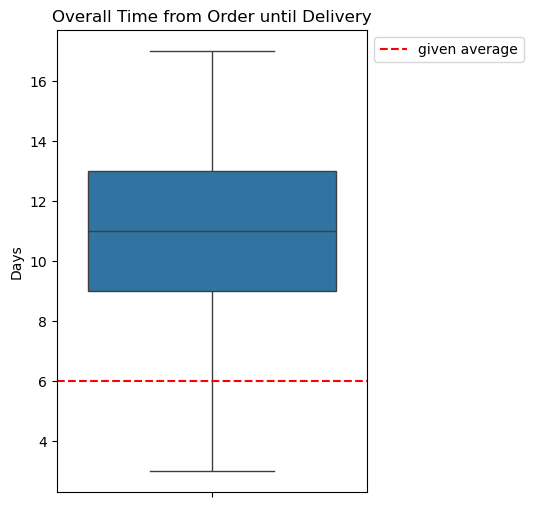

In [29]:
plt.subplots(figsize = (4,6))

sns.boxplot(data=delivery['total_days']); #?? Was ist hier schief, wie bekommen wir hier eine schönere Darstellung?? --> Datentyp timedelta lässt sich nicht gut darstellen,
#daher ist eine Umwandlung in einen Integer notwendig!
plt.axhline(y=6, color='red', linestyle='--', label ='given average')


plt.ylabel('Days')
plt.title('Overall Time from Order until Delivery')
plt.legend(bbox_to_anchor=(1.0, 1.0))


plt.show()

Inner merge between orders_clean and on_truck_clean inner to get processing time (Processing)

In [30]:
pickup_truck_comp.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,date_difference
0,US-2020-165456,2020-11-30,2020-12-04,Express,2020-12-03,2020-12-04,0 days
1,CA-2020-119305,2020-11-30,2020-12-07,Standard Processing,2020-12-04,2020-12-07,0 days


In [31]:
pickup_truck_comp['process_time'] = pickup_truck_comp['ready_to_ship_date'] - pickup_truck_comp['order_date']
pickup_truck_comp.value_counts('process_time')

process_time
5 days    44
4 days    39
6 days    37
2 days    24
3 days    20
7 days    18
0 days    16
1 days     4
8 days     2
Name: count, dtype: int64

In [32]:
time_by_mode = pickup_truck_comp.groupby(['ship_mode']).agg({'process_time':'mean'})
time_by_mode

,process_time
ship_mode,
Express,2 days 00:54:20.377358490
Standard Processing,4 days 22:15:05.960264900


In [33]:
pickup_truck_comp.groupby(['ship_mode']).agg({'process_time':'median'})


,process_time
ship_mode,
Express,2 days
Standard Processing,5 days


Timeframe between ready to ship and leaving warehouse (Leaving Warehouse)

In [34]:
pickup_truck_comp['time_ready_leave'] = pickup_truck_comp['on_truck_scan_date'] - pickup_truck_comp['ready_to_ship_date']
pickup_truck_comp.value_counts('time_ready_leave')

time_ready_leave
2 days    82
1 days    55
3 days    34
0 days    33
Name: count, dtype: int64

In [35]:
time_ready_by_mode = pickup_truck_comp.groupby(['ship_mode']).agg({'time_ready_leave':'mean'})
time_ready_by_mode

,time_ready_leave
ship_mode,
Express,0 days 09:30:33.962264150
Standard Processing,1 days 23:40:55.629139072


In [36]:
pickup_truck_comp.groupby(['ship_mode']).agg({'time_ready_leave':'median'})

,time_ready_leave
ship_mode,
Express,0 days
Standard Processing,2 days


Inner merge merged ready to ship data (first merging point here) with delivered_clean, to get shipping time (Shipping)

In [37]:
delivery2.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,date_difference
0,US-2020-139647,2020-05-11,2020-05-13,Express,2020-05-15,4 days
1,US-2020-104451,2020-05-08,2020-05-13,Standard Processing,2020-05-15,7 days


In [38]:
delivery2['shipping_time'] = delivery2['arrival_scan_date']-delivery2['on_truck_scan_date']
delivery2.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,date_difference,shipping_time
0,US-2020-139647,2020-05-11,2020-05-13,Express,2020-05-15,4 days,2 days
1,US-2020-104451,2020-05-08,2020-05-13,Standard Processing,2020-05-15,7 days,2 days


In [65]:
print('from' , delivery2['order_date'].min())
print('until' , delivery2['order_date'].max())

from 2019-04-19 00:00:00
until 2020-05-11 00:00:00


In [39]:
shipping_by_mode = delivery2.groupby(['ship_mode']).agg({'shipping_time':'mean'})
shipping_by_mode

,shipping_time
ship_mode,
Express,4 days 11:31:12
Standard Processing,4 days 15:20:55.813953488


In [40]:
delivery2.groupby(['ship_mode']).agg({'shipping_time':'median'})

,shipping_time
ship_mode,
Express,5 days
Standard Processing,5 days


Weekday: df["trending_weekday"]=df["trending_date"].dt.dayofweek

# Plotting

## Overall Process

In [41]:
type(total_time_by_mode2['date_difference'])

pandas.core.series.Series

In [42]:
total_time_by_mode2['days'] = total_time_by_mode2['date_difference'].dt.days

In [43]:
total_time_by_mode2['process_hours'] = total_time_by_mode2['date_difference'] / pd.Timedelta(hours=1)
total_time_by_mode2['days2'] = (total_time_by_mode2['process_hours'] / 24).round(1)

In [44]:
total_time_by_mode2.head()

,ship_mode,date_difference,days,process_hours,days2
0,Express,7 days 01:16:48,7,169.280000,7.1
1,Standard Processing,11 days 22:25:06.976744186,11,286.418605,11.9


In [45]:
total_time_by_mode2['date_difference'].mean()

Timedelta('9 days 11:50:57.488372093')

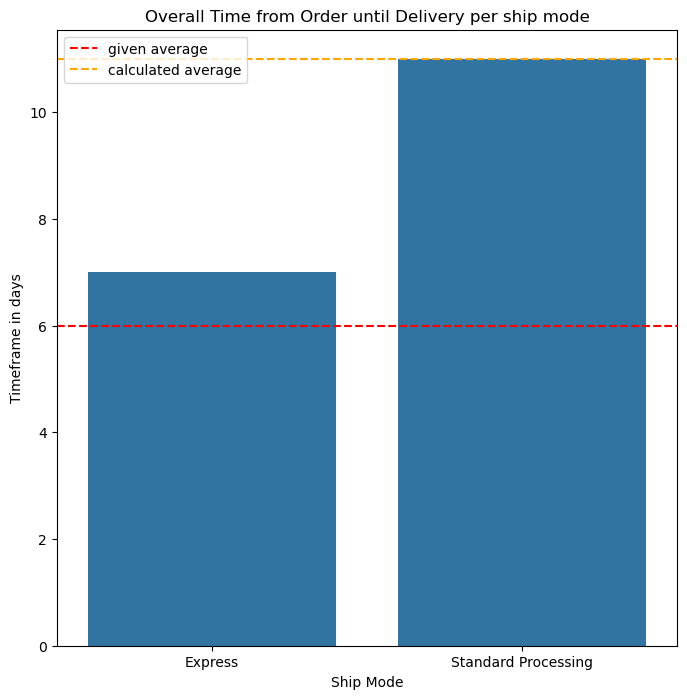

In [46]:
plt.figure(figsize=(8, 8))
sns.barplot(total_time_by_mode2, x='ship_mode', y='days')

# Adding a red horizontal line at a fixed y value
plt.axhline(y=6, color='red', linestyle='--', label='given average')
plt.axhline(y=11, color='orange', linestyle='--', label='calculated average')

# Setting labels and title
plt.xlabel('Ship Mode')
plt.ylabel('Timeframe in days')
plt.title('Overall Time from Order until Delivery per ship mode')
plt.legend()

plt.show()

In [47]:
delivery2 = on_truck_clean.merge(delivered_clean, how="inner", on="order_id")
delivery2["date_difference"] = delivery2["arrival_scan_date"] - delivery2["order_date"]
total_time_by_mode2 = delivery2.groupby('ship_mode')['date_difference'].median().reset_index().round()
total_time_by_mode2

,ship_mode,date_difference
0,Express,7 days
1,Standard Processing,12 days


## From Order until ready to ship

In [48]:
time_by_mode2 = pickup_truck_comp.groupby(['ship_mode']).agg({'process_time':'median'})
time_by_mode2

,process_time
ship_mode,
Express,2 days
Standard Processing,5 days


In [49]:
time_by_mode2['process_days'] = time_by_mode2['process_time'].dt.days

In [50]:
time_by_mode2['process_hours'] = time_by_mode2['process_time'] / pd.Timedelta(hours=1)
time_by_mode2['process_days2'] = (time_by_mode2['process_hours'] / 24).round(1)

In [51]:
time_by_mode2.head()

,process_time,process_days,process_hours,process_days2
ship_mode,,,,
Express,2 days,2,48.0,2.0
Standard Processing,5 days,5,120.0,5.0


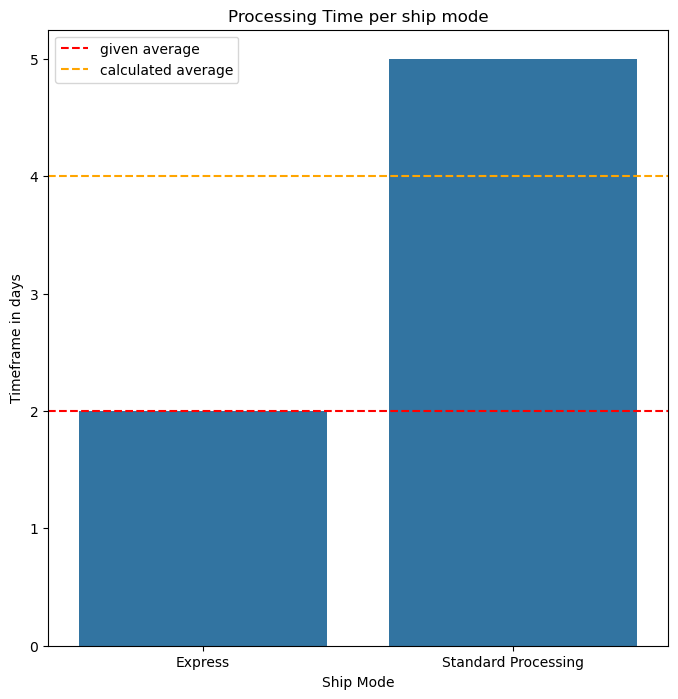

In [52]:
plt.figure(figsize=(8, 8))
sns.barplot(time_by_mode2, x='ship_mode', y='process_days')

# Adding a red horizontal line at a fixed y value
plt.axhline(y=2, color='red', linestyle='--', label='given average')
plt.axhline(y=4, color='orange', linestyle='--', label='calculated average')

# Setting labels and title
plt.xlabel('Ship Mode')
plt.ylabel('Timeframe in days')
plt.title('Processing Time per ship mode')
plt.legend()

plt.show()

## Ready to ship until pickup

In [53]:
time_ready_by_mode = pickup_truck_comp.groupby(['ship_mode']).agg({'time_ready_leave':'mean'})
time_ready_by_mode

,time_ready_leave
ship_mode,
Express,0 days 09:30:33.962264150
Standard Processing,1 days 23:40:55.629139072


In [54]:
time_ready_by_mode['leaving_days'] = time_ready_by_mode['time_ready_leave']/ pd.Timedelta(hours=1)



In [55]:
time_ready_by_mode.head()

,time_ready_leave,leaving_days
ship_mode,,
Express,0 days 09:30:33.962264150,9.509434
Standard Processing,1 days 23:40:55.629139072,47.682119


In [56]:
pickup_truck_comp.agg({'time_ready_leave':'mean'})

time_ready_leave   1 days 13:45:52.941176470
dtype: timedelta64[ns]

In [63]:
pickup_truck_comp.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,date_difference,process_time,time_ready_leave
0,US-2020-165456,2020-11-30,2020-12-04,Express,2020-12-03,2020-12-04,0 days,3 days,1 days
1,CA-2020-119305,2020-11-30,2020-12-07,Standard Processing,2020-12-04,2020-12-07,0 days,4 days,3 days


In [64]:
print('from' , pickup_truck_comp['order_date'].min())
print('until' , pickup_truck_comp['order_date'].max())

from 2019-09-02 00:00:00
until 2020-11-30 00:00:00


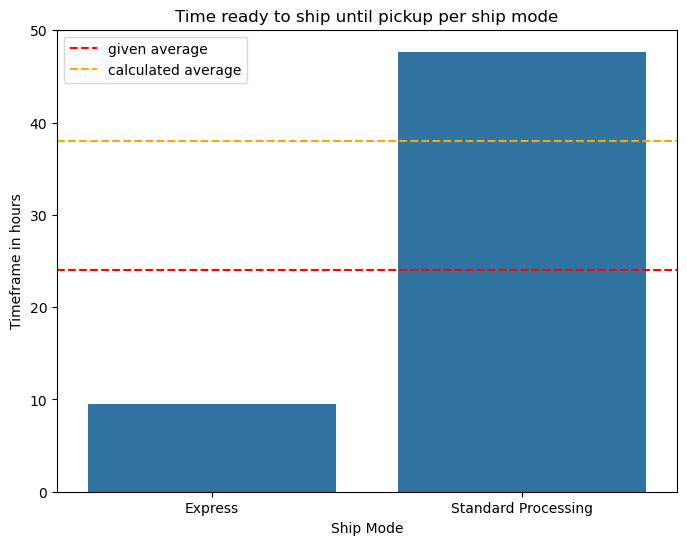

In [57]:
plt.figure(figsize=(8, 6))
sns.barplot(time_ready_by_mode, x='ship_mode', y='leaving_days')

# Adding a red horizontal line at a fixed y value
plt.axhline(y=24, color='red', linestyle='--', label ='given average')
plt.axhline(y=38, color='orange', linestyle='--', label='calculated average')

# Setting labels and title
plt.xlabel('Ship Mode')
plt.ylabel('Timeframe in hours')
plt.title('Time ready to ship until pickup per ship mode')
plt.legend()

plt.show()

## Shipping time from pickup till delivery

In [58]:
delivery2['shipping_time'] = delivery2['arrival_scan_date']-delivery2['on_truck_scan_date']
delivery2.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,date_difference,shipping_time
0,US-2020-139647,2020-05-11,2020-05-13,Express,2020-05-15,4 days,2 days
1,US-2020-104451,2020-05-08,2020-05-13,Standard Processing,2020-05-15,7 days,2 days


In [59]:
delivery2.head()

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,date_difference,shipping_time
0,US-2020-139647,2020-05-11,2020-05-13,Express,2020-05-15,4 days,2 days
1,US-2020-104451,2020-05-08,2020-05-13,Standard Processing,2020-05-15,7 days,2 days
2,CA-2020-141733,2020-05-07,2020-05-13,Standard Processing,2020-05-15,8 days,2 days
3,CA-2020-125381,2020-04-25,2020-05-01,Standard Processing,2020-05-08,13 days,7 days
4,CA-2020-129707,2020-04-25,2020-05-04,Standard Processing,2020-05-08,13 days,4 days


In [61]:
print('from' , delivery2['order_date'].min())
print('until' , delivery2['order_date'].max())

from 2019-04-19 00:00:00
until 2020-05-11 00:00:00


In [129]:
shipping_by_mode = delivery2.groupby(['ship_mode']).agg({'shipping_time':'mean'})
shipping_by_mode

,shipping_time
ship_mode,
Express,4 days 11:31:12
Standard Processing,4 days 15:20:55.813953488


In [132]:
delivery2.agg({'shipping_time':'mean'})

shipping_time   4 days 14:29:11.351351351
dtype: timedelta64[ns]

In [135]:
shipping_by_mode['shipping_days'] = shipping_by_mode['shipping_time'].dt.days

In [144]:
shipping_by_mode['shipping_hours'] = shipping_by_mode['shipping_time'] / pd.Timedelta(hours=1)
shipping_by_mode['shipping_days2'] = (shipping_by_mode['shipping_hours'] / 24).round(1)

In [145]:
shipping_by_mode.head()

,shipping_time,shipping_days,shipping_hours,shipping_days2
ship_mode,,,,
Express,4 days 11:31:12,4,107.520000,4.5
Standard Processing,4 days 15:20:55.813953488,4,111.348837,4.6


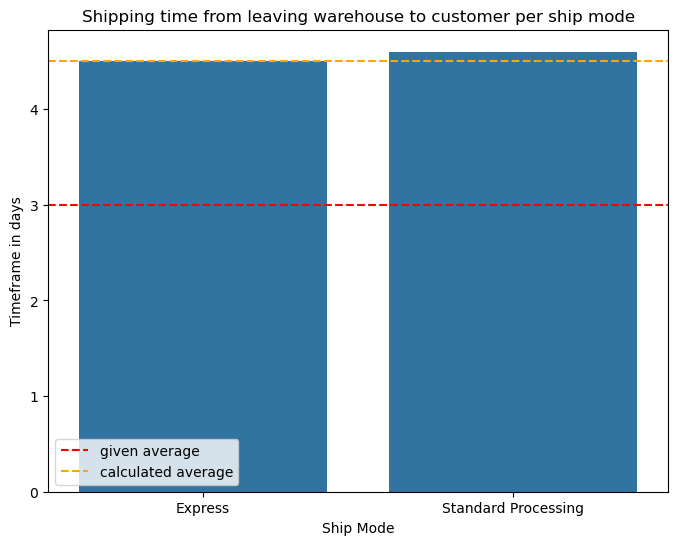

In [148]:
plt.figure(figsize=(8, 6))
sns.barplot(shipping_by_mode, x='ship_mode', y='shipping_days2')

# Adding a red horizontal line at a fixed y value
plt.axhline(y=3, color='red', linestyle='--', label ='given average')
plt.axhline(y=4.5, color='orange', linestyle='--', label='calculated average')

# Setting labels and title
plt.xlabel('Ship Mode')
plt.ylabel('Timeframe in days')
plt.title('Shipping time from leaving warehouse to customer per ship mode')
plt.legend()

plt.show()